<a href="https://colab.research.google.com/github/henriquecbz/henriquecbz/blob/main/Dados_B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

In [5]:
ibov = web.get_data_yahoo('^BVSP')

[*********************100%***********************]  1 of 1 completed


In [6]:
ibov.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-26,110207.000000,112695.000000,110204.000000,111573.000000,111573.000000,15513800
2022-01-27,111303.000000,113057.000000,111303.000000,112315.000000,112315.000000,14812000
2022-01-28,112611.000000,112969.000000,111407.000000,111478.000000,111478.000000,13520100
2022-01-31,111910.000000,112495.000000,111195.000000,112388.000000,112388.000000,12190800
2022-02-01,112143.421875,113302.132812,112134.882812,113082.046875,113082.046875,0


In [7]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-04-27,24.799999,25.400000,24.500000,24.500000,24.500000,0
1993-04-28,24.500000,24.600000,23.700001,24.299999,24.299999,0
1993-04-29,24.299999,24.799999,23.700001,23.700001,23.700001,0
1993-04-30,23.700001,24.200001,23.700001,24.100000,24.100000,0
1993-05-03,24.100000,24.400000,23.799999,24.100000,24.100000,0


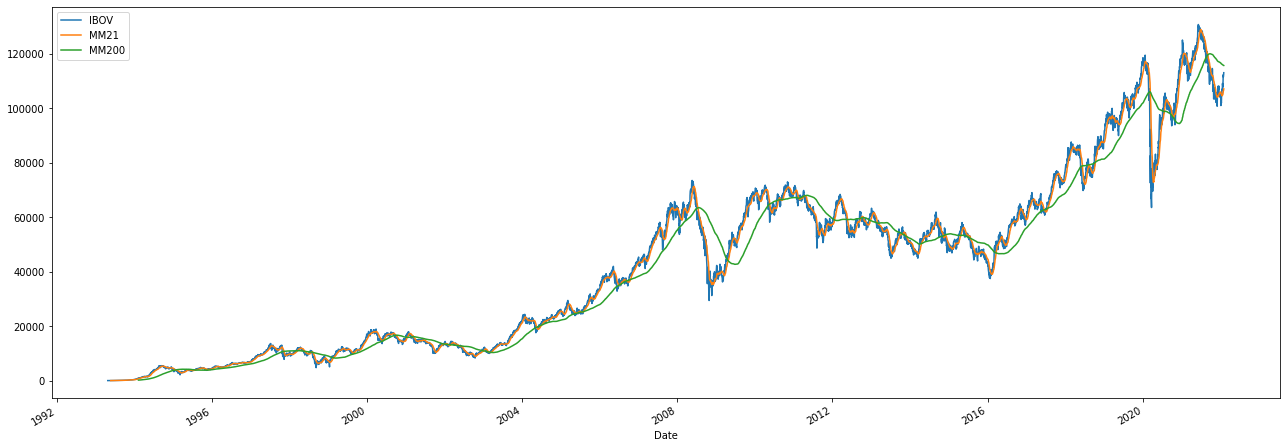

In [24]:
ibov["Close"].plot(figsize=(22,8), label="IBOV")
ibov["Close"].rolling(21).mean().plot(label=("MM21"))
ibov["Close"].rolling(200).mean().plot(label=("MM200"))
plt.legend()

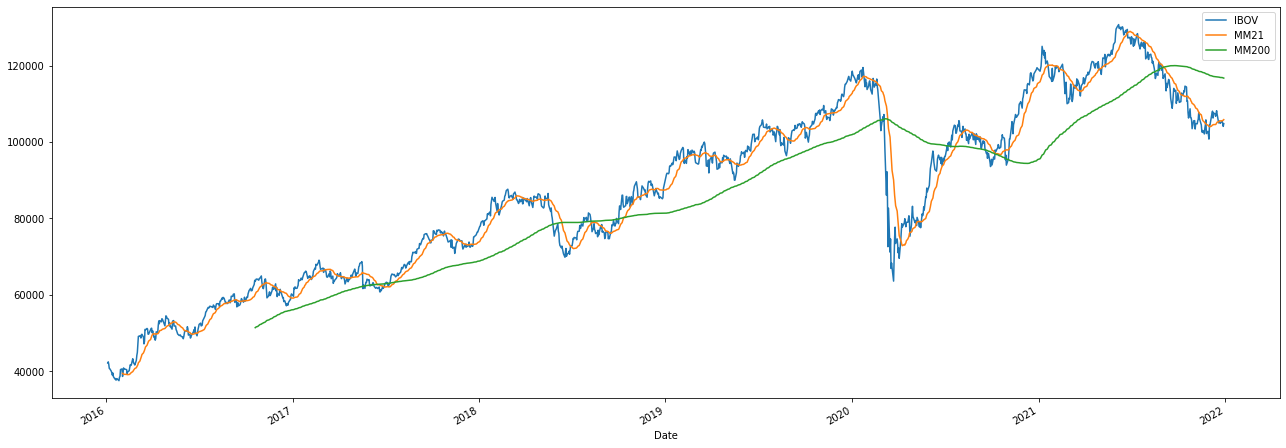

In [31]:
ibov2016_2021 = ibov[(ibov.index.year >=2016) & (ibov.index.year <= 2021)]
ibov2016_2021["Close"].plot(figsize=(22,8), label="IBOV")
ibov2016_2021["Close"].rolling(21).mean().plot(label=("MM21"))
ibov2016_2021["Close"].rolling(200).mean().plot(label=("MM200"))
plt.legend()

In [42]:
tickers = ["^BVSP", "BRL=X"]
carteira = web.get_data_yahoo(tickers,start="2007-01-01")["Close"]
carteira = carteira.dropna()
carteira

[*********************100%***********************]  2 of 2 completed


,BRL=X,^BVSP
Date,,
2007-01-02,2.131000,45383.000000
2007-01-03,2.134500,44445.000000
2007-01-04,2.139000,44020.000000
2007-01-05,2.147000,42245.000000
2007-01-08,2.146500,42830.000000
...,...,...
2022-01-26,5.440704,111573.000000
2022-01-27,5.429167,112315.000000
2022-01-28,5.403485,111478.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d671f13d0>,
      dtype=object)

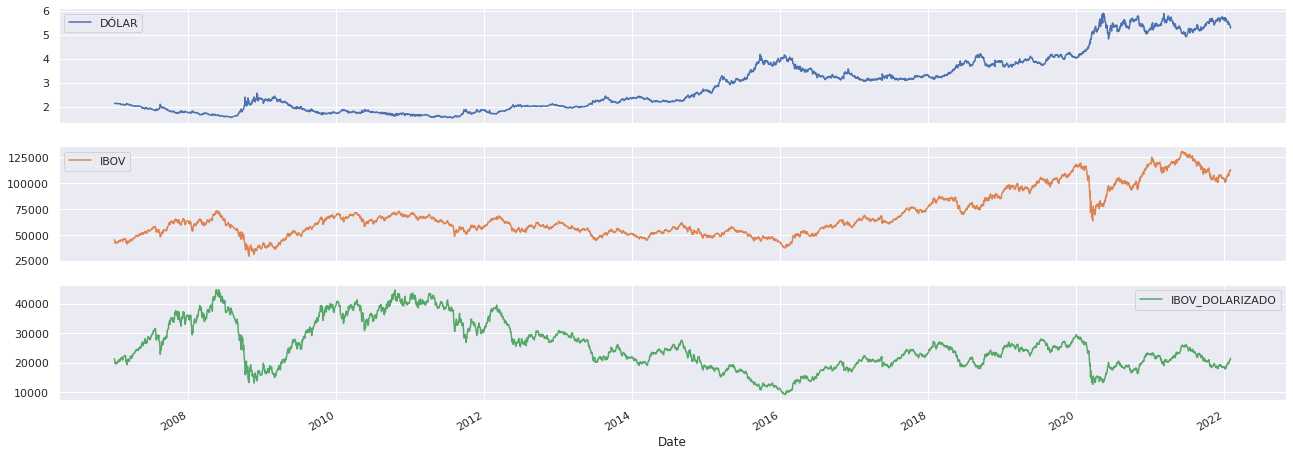

In [62]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8))

In [ ]:
carteira.columns = ["DÓLAR","IBOV"]
carteira

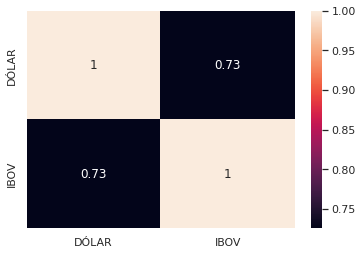

In [53]:
sns.heatmap(carteira.corr(), annot=True)

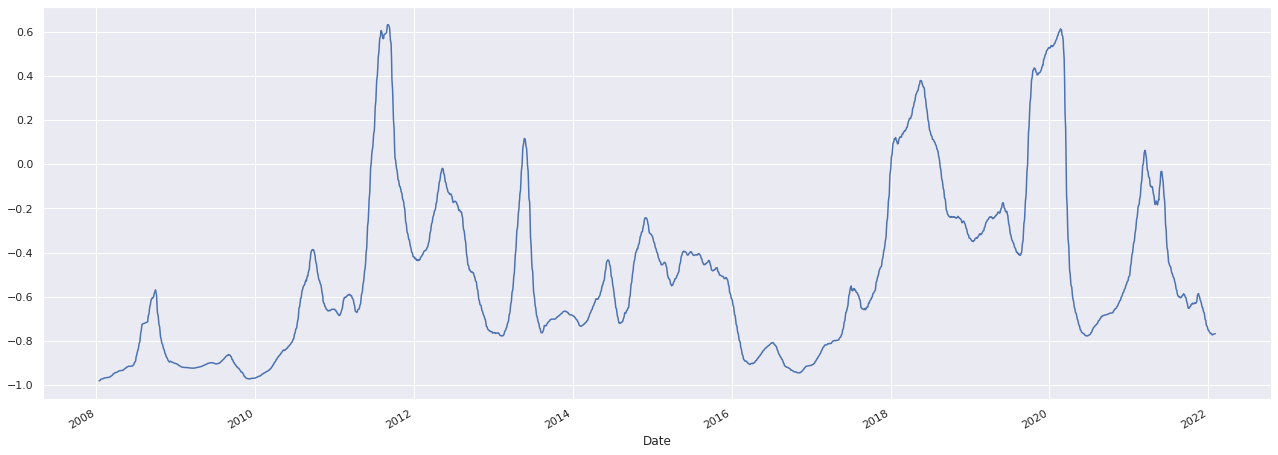

In [55]:
carteira["DÓLAR"].rolling(252).corr(carteira["IBOV"]).plot(figsize=(22,8))

In [61]:
carteira["IBOV_DOLARIZADO"] = (carteira["IBOV"]/carteira["DÓLAR"])
carteira

,DÓLAR,IBOV,IBOV_DOLARIZADO
Date,,,
2007-01-02,2.131000,45383.000000,21296.573959
2007-01-03,2.134500,44445.000000,20822.206345
2007-01-04,2.139000,44020.000000,20579.710732
2007-01-05,2.147000,42245.000000,19676.291819
2007-01-08,2.146500,42830.000000,19953.411504
...,...,...,...
2022-01-26,5.440704,111573.000000,20507.089283
2022-01-27,5.429167,112315.000000,20687.336430
2022-01-28,5.403485,111478.000000,20630.760275
